I0
[2.96407724]
[0.19219475]
bfit
[0.00014311]
[8.31757243e-06]


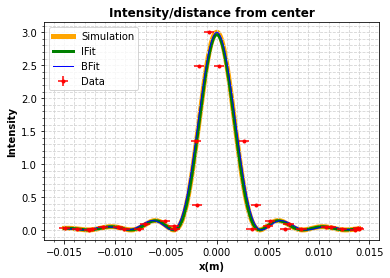

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


lung_onda = 632.8e-09
L = 1
b = 150e-06
Intens = 3


xdata = np.array([])
xdataerr = 0.0005
Idata = np.array([])
Idataerr = 0.0005

#simulation
def intensityFunction(x):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

xdata = np.linspace(-0.015,0.015,31)
for i in range(len(xdata)):
  if(xdata[i] == 0):
    xdata[i] = 0.000001
Idata = intensityFunction(xdata)

xdata = xdata - np.random.normal(0,xdataerr,len(xdata))
Idata = Idata - np.random.normal(0,Idataerr,len(Idata))

#fitting Intensity
def intensityFunctionFit(x,I0):
  return (I0*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
guess = np.array([Intens])
popt, pcov = scipy.optimize.curve_fit(intensityFunctionFit, xdata, Idata,sigma=np.ones(len(Idata))*Idataerr, p0 = guess)

I0err = np.sqrt(np.diag(pcov))
I0 = popt
print("I0")

print(I0)
print(I0err)

xfit = np.linspace(min(xdata), max(xdata), 1000)
yfit = intensityFunctionFit(xfit,I0)

#fitting distance from measured intensity
def distanceFunctionFit(x,b):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata, Idata,sigma=np.ones(len(Idata))*Idataerr, p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")

print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfit,bfit)




x = np.linspace(min(xdata),max(xdata),1000)
y = intensityFunction(x)

#graph

fig = plt.figure()
ax = fig.gca()
plt.title("Intensity/distance from center",fontweight="bold")
plt.xlabel("x(m)",fontweight="bold")
plt.ylabel("Intensity",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.errorbar(xdata,Idata, xerr = xdataerr, yerr=Idataerr,label="Data", color = "red", fmt='o', markersize=3, zorder=4)
plt.plot(x,y, label="Simulation", color="orange", linewidth=5, zorder=1)
plt.plot(xfit,yfit, label="IFit", color="green", linewidth=3, zorder=2)
plt.plot(xfitb,yfitb, label="BFit", color="blue", linewidth=1, zorder=3)
plt.legend(loc="upper left")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')
plt.show()

maxIntens
4.90207
bfit
[8.2988706e-05]
[2.1581634e-07]
b
8e-05


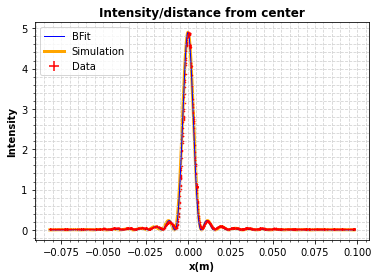

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Table = np.loadtxt("/content/drive/MyDrive/Github/OtticaGruppo8/sets/Antonio_0.08_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Intensity = Table[0]
Position = Table[1]


#Position = Position+PositionMean

maxint = np.argmax(Intensity)

#Position = 0.526*(Position-Position[maxint])
Position = (Position-Position[maxint])
PositionMean = np.abs(np.min(Position)+np.max(Position))/2


#Position = Position+PositionMean

#Table = np.loadtxt("/content/Antonio004-15.tsv", delimiter="\t", skiprows=1, unpack = False, dtype='str')
#Table = Table.transpose()

#Intensity = Table[0]
#Intensity = [s.replace(',' , '.') for s in Intensity]
#Position = Table[1]
#Position = [float(s.replace(',' , '.')) for s in Position]
#print(Intensity)
#PositionMean = np.abs(np.min(Position)+np.max(Position))/2

#Position = Position+PositionMean


lung_onda = 650e-09
L = 0.99
b = 0.08e-03
Intens = np.max(Intensity)
print('maxIntens')
print(Intens)

xdata = Position
xdataerr = 0.0000001*Position
Idata = Intensity
Idataerr=0
Idataerr = 0.00000001*Intensity

#simulation
def intensityFunction(x):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
for i in range(len(xdata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])


x = np.linspace(min(xdata),max(xdata),1000)
y = intensityFunction(x)


#fitting distance from measured intensity
def distanceFunctionFit(x,b):
  return (Intens*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")

print(bfit)
print(bfiterr)
print("b")
print(b)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit)


#graph

fig = plt.figure()
ax = fig.gca()
plt.title("Intensity/distance from center",fontweight="bold")
plt.xlabel("x(m)",fontweight="bold")
plt.ylabel("Intensity",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(xdata,Idata, xerr = xdataerr, yerr=Idataerr,label="Data", color = "red", fmt='o', markersize=0.55, zorder=4)
plt.plot(xfitb,yfitb, label="BFit", color="blue", linewidth=1, zorder=3)
plt.plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
plt.legend(loc="upper left")
plt.minorticks_on()
plt.grid(True,"minor",linestyle="--",color='lightgray')
plt.show()
